<h1><font size=12>
Weather Derivatites </h1>
<h1> Rainfall Simulator -- Full modeling <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
16 September 2018 


In [1]:
# Import needed libraries. 
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import gamma
import pickle
import time
import datetime
from scipy import stats

# Generate artificial Data

In [2]:
### ENSO probabilistic forecast.

# Open saved data.
ensoForecast = pickle.load(open('../../datasets/ensoForecastProb/ensoForecastProbabilities.pickle','rb'))

# Print an example .. ( Format needed)

ensoForecast['2005-01']

,Season,La Niña,Neutral,El Niño
0,JFM 2005,0%,15%,85%
1,FMA 2005,0%,17%,83%
2,MAM 2005,1%,24%,75%
3,AMJ 2005,2%,43%,55%
4,MJJ 2005,4%,51%,45%
5,JJA 2005,6%,54%,40%
6,JAS 2005,8%,52%,40%
7,ASO 2005,9%,51%,40%
8,SON 2005,10%,50%,40%
9,OND 2005,10%,50%,40%


In [3]:
### Create total dataframe.

def createTotalDataFrame(daysNumber, startDate , initialState , initialPrep , ensoForecast, optionMonthTerm ):
    # Set variables names.
    totalDataframeColumns = ['state','Prep','Month','probNina','probNino', 'nextState']

    # Create dataframe.

    allDataDataframe = pd.DataFrame(columns=totalDataframeColumns) 

    # Number of simulation days(i.e 30, 60)
    daysNumber = daysNumber

    # Simulation start date ('1995-04-22')
    startDate = startDate

    # State of rainfall last day before start date --> Remember 0 means dry and 1 means wet.
    initialState = initialState
    initialPrep = initialPrep   # Only fill when initialState == 1  


    dates = pd.date_range(startDate, periods = daysNumber + 2 , freq='D')

    for date in dates: 

        # Fill precipitation amount.
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Prep'] = np.nan

        # Fill month of date 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Month'] = date.month
        
        tempDate = None
        if optionMonthTerm==1:
            tempDate = date 
        else:
            tempDate = date - pd.DateOffset(months=optionMonthTerm-1)
        
        # Fill El Nino ENSO forecast probability. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'probNino'] = float(ensoForecast[tempDate.strftime('%Y-%m')].loc[optionMonthTerm-1,'El Niño'].strip('%').strip('~'))/100

        # Fill La Nina ENSO forecast probability. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'probNina'] = float(ensoForecast[tempDate.strftime('%Y-%m')].loc[optionMonthTerm-1,'La Niña'].strip('%').strip('~'))/100

        # Fill State. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'state'] = np.nan


    simulationDataFrame = allDataDataframe[:-1]

    # Fill initial conditions. 
    simulationDataFrame['state'][0] = initialState
    if initialState == 1:
        simulationDataFrame['Prep'][0] = initialPrep
    else:
        simulationDataFrame['Prep'][0] = 0.0
    
    return simulationDataFrame

simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2005-01-01', initialState = 1 , initialPrep =  0.4, ensoForecast = ensoForecast, optionMonthTerm=6)
simulationDataFrame

/home/jesus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,state,Prep,Month,probNina,probNino,nextState
2005-01-01,1,0.4,1,0.03,0.4,NaN
2005-01-02,NaN,NaN,1,0.03,0.4,NaN
2005-01-03,NaN,NaN,1,0.03,0.4,NaN
2005-01-04,NaN,NaN,1,0.03,0.4,NaN
2005-01-05,NaN,NaN,1,0.03,0.4,NaN
2005-01-06,NaN,NaN,1,0.03,0.4,NaN
2005-01-07,NaN,NaN,1,0.03,0.4,NaN
2005-01-08,NaN,NaN,1,0.03,0.4,NaN
2005-01-09,NaN,NaN,1,0.03,0.4,NaN
2005-01-10,NaN,NaN,1,0.03,0.4,NaN


In [5]:
### Load transitions and amount parameters.

# Transitions probabilites.
transitionsParametersDry = pd.read_csv('../../results/visibleMarkov/transitionsParametersDry.csv', sep = ' ', header=None, names = ['variable', 'value'])
transitionsParametersDry.index += 1 
transitionsParametersDry

transitionsParametersWet = pd.read_csv('../../results/visibleMarkov/transitionsParametersWet.csv', sep = ' ', header=None, names = ['variable', 'value'])
transitionsParametersWet.index += 1 
transitionsParametersWet

amountParametersGamma = pd.read_csv('../../results/visibleMarkov/amountGammaPro.csv', sep = ' ', header=None, names = ['variable', 'mu', 'shape'])
amountParametersGamma.index += 1 
'''
# !!!!!! Delete !!!!!!!!!!!!!11. 
amountParametersGamma = pd.read_csv('../results/visibleMarkov/fittedGamma.csv', index_col=0)
'''
print(transitionsParametersDry)

print('\n * Intercept means firts month (January) ')


       variable     value
1   (Intercept) -1.168017
2        Month2  0.346713
3        Month3  0.848934
4        Month4  1.563185
5        Month5  1.567584
6        Month6  1.132592
7        Month7  1.311161
8        Month8  1.432857
9        Month9  0.924944
10      Month10  1.587704
11      Month11  1.356612
12      Month12  0.518480
13     probNino -0.453497
14     probNina  0.176919

 * Intercept means firts month (January) 


## Simulation Function Core

In [6]:
### Build the simulation core.

# Updates the state of the day based on yesterday state. 
def updateState(yesterdayIndex, simulationDataFrame, transitionsParametersDry, transitionsParametersWet):
    
    # Additional data of day.
    yesterdayState = simulationDataFrame['state'][yesterdayIndex]
    yesterdayPrep = simulationDataFrame['Prep'][yesterdayIndex]
    yesterdayProbNino = simulationDataFrame['probNino'][yesterdayIndex]
    yesterdayProbNina = simulationDataFrame['probNina'][yesterdayIndex]
    yesterdayMonth = simulationDataFrame['Month'][yesterdayIndex]
    
    # Calculate transition probability.
    if yesterdayState == 0:
        # Includes month factor + probNino value + probNino value.
        successProbabilityLogit = transitionsParametersDry['value'][1]+transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersDry['value'][13] +  yesterdayProbNina*transitionsParametersDry['value'][14]
              
        if yesterdayMonth==1: 
            # Includes month factor + probNino value + probNino value.
            successProbabilityLogit = transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersDry['value'][13] +  yesterdayProbNina*transitionsParametersDry['value'][14]
            
        successProbability = (np.exp(successProbabilityLogit))/(1+np.exp(successProbabilityLogit)) 
        
    elif yesterdayState == 1:
        # Includes month factor + probNino value + probNino value + prep value .
        successProbabilityLogit = transitionsParametersDry['value'][1]+ transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersWet['value'][14] +  yesterdayProbNina*transitionsParametersWet['value'][15] + yesterdayPrep*transitionsParametersWet['value'][13] 
        
        if yesterdayMonth==1:
            # Includes month factor + probNino value + probNino value + prep value .
            successProbabilityLogit = transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersWet['value'][14] +  yesterdayProbNina*transitionsParametersWet['value'][15] + yesterdayPrep*transitionsParametersWet['value'][13] 
        
        successProbability = (np.exp(successProbabilityLogit))/(1+np.exp(successProbabilityLogit))    
    else:
        print('State of date: ', simulationDataFrame.index[yesterdayIndex],' not found.')
    
    #print(successProbability)
    #successProbability = monthTransitions['p'+str(yesterdayState)+'1'][yesterdayMonth] 
    
    todayState = bernoulli.rvs(successProbability)
    
    return todayState 

In [10]:
# Simulates one run of simulation. 
def oneRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma):
    
    # Define the total rainfall amount over the simulation.
    rainfall = 0
    
    # Total rainfall days.
    wetDays = 0
    
    # Loop over days in simulation to calculate rainfall ammount.
    for day in range(1,len(simulationDataFrame)):
        
        # Get today date. 
        dateOfDay = datetime.datetime.strptime(simulationDataFrame.index[day],'%Y-%m-%d')
       
    
        # Update today state based on the yesterday state. 
        todayState = updateState(day-1, simulationDataFrame, transitionsParametersDry, transitionsParametersWet)
        
        # Write new day information.
        simulationDataFrame['state'][day] = todayState
        simulationDataFrame['nextState'][day-1] = todayState
        
        # Computes total accumulated rainfall.
        if todayState == 1:
            
            # Sum wet day.
            wetDays+=1
            
            # Additional data of day.
            todayProbNino = simulationDataFrame['probNino'][day]
            todayProbNina = simulationDataFrame['probNina'][day]
            todayMonth = simulationDataFrame['Month'][day]
            
            
            
            # Calculates gamma log(mu).
            gammaLogMu = amountParametersGamma['mu'][1] + amountParametersGamma['mu'][todayMonth]+ todayProbNino*amountParametersGamma['mu'][13]+todayProbNino*amountParametersGamma['mu'][13] 
            #print(gammaMu)
            # Calculates gamma scale
            gammaLogShape = amountParametersGamma['shape'][1] + amountParametersGamma['shape'][todayMonth]+ todayProbNino*amountParametersGamma['shape'][13]+todayProbNino*amountParametersGamma['shape'][13]
            #print(gammaShape)
            
            if todayMonth==1:
                # Calculates gamma log(mu).
                gammaLogMu =  amountParametersGamma['mu'][todayMonth]+ todayProbNino*amountParametersGamma['mu'][13]+todayProbNino*amountParametersGamma['mu'][13] 
                #print(gammaMu)
                # Calculates gamma scale
                gammaLogShape = amountParametersGamma['shape'][todayMonth]+ todayProbNino*amountParametersGamma['shape'][13]+todayProbNino*amountParametersGamma['shape'][13]
                #print(gammaShape)
            
            # Update mu
            gammaMu = np.exp(gammaLogMu)
            
            # Update shape
            gammaShape = np.exp(gammaLogShape)
            
            # Calculate gamma scale.
            gammaScale = gammaMu / gammaShape
            
            # Generate random rainfall.
            todayRainfall = gamma.rvs(a = gammaShape, scale = gammaScale)
            
            '''
            
            # !!!!!! Delete !!!!!!!!!!!!!11. 
            todayRainfall = gamma.rvs(amountParametersGamma['Shape'][0],amountParametersGamma['Loc'][0],amountParametersGamma['Scale'][0]) 
            
            '''
            
            
            # Write new day information.
            simulationDataFrame['Prep'][day] = todayRainfall
            
            # Updates rainfall amount. 
            rainfall += todayRainfall
            
        else:
            # Write new day information.
            simulationDataFrame['Prep'][day] = 0
            
        
        yesterdayState = todayState
        print(simulationDataFrame)   
    
    return rainfall,wetDays

In [8]:
updateState(0, simulationDataFrame, transitionsParametersDry, transitionsParametersWet)

0

In [11]:
# Run only one iteration(Print structure of results)

# Simulations iterations.
iterations = 10000

oneRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma)


           state         Prep Month probNina probNino nextState
2005-01-01     1          0.4     1     0.03      0.4         0
2005-01-02     0            0     1     0.03      0.4         0
2005-01-03     0            0     1     0.03      0.4         0
2005-01-04     0            0     1     0.03      0.4         1
2005-01-05     1  0.000622157     1     0.03      0.4         0
2005-01-06     0            0     1     0.03      0.4         0
2005-01-07     0            0     1     0.03      0.4         1
2005-01-08     1      3.39851     1     0.03      0.4         0
2005-01-09     0            0     1     0.03      0.4         0
2005-01-10     0            0     1     0.03      0.4         0
2005-01-11     0            0     1     0.03      0.4         0
2005-01-12     0            0     1     0.03      0.4         0
2005-01-13     0            0     1     0.03      0.4         0
2005-01-14     0            0     1     0.03      0.4         0
2005-01-15     0            0     1     

(12.006363952477816, 6)

## Complete Simulation

In [9]:
# Run total iterations.
def totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations):
    
    # Initialize time 
    startTime = time.time()
    
    # Array to store all precipitations.
    rainfallPerIteration = [None]*iterations
    
    wetDaysPerIteration = [None]*iterations
    
    # Loop over each iteration(simulation)
    
    for i in range(iterations):
        
        simulationDataFrameC = simulationDataFrame.copy()
        
        iterationRainfall,wetDays = oneRun(simulationDataFrameC, transitionsParametersDry, transitionsParametersWet, amountParametersGamma)
        
        rainfallPerIteration[i] = iterationRainfall
        
        wetDaysPerIteration[i] = wetDays
    
    # Calculate time
    currentTime = time.time() - startTime 
    
    # Print mean of wet days. 
    
    print('The mean of wet days is: ', np.mean(wetDaysPerIteration))
    
    # Logging time.
    print('The elapsed time over simulation is: ', currentTime, ' seconds.')
    
    return rainfallPerIteration

In [10]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-12-18', initialState = 1 , initialPrep =  0.4, ensoForecast = ensoForecast)
simulationDataFrame.head()

TypeError: createTotalDataFrame() missing 1 required positional argument: 'optionMonthTerm'

## Final Results

In [11]:
# Final Analysis.

finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)


The mean of wet days is:  11.523
The elapsed time over simulation is:  28.88295292854309  seconds.


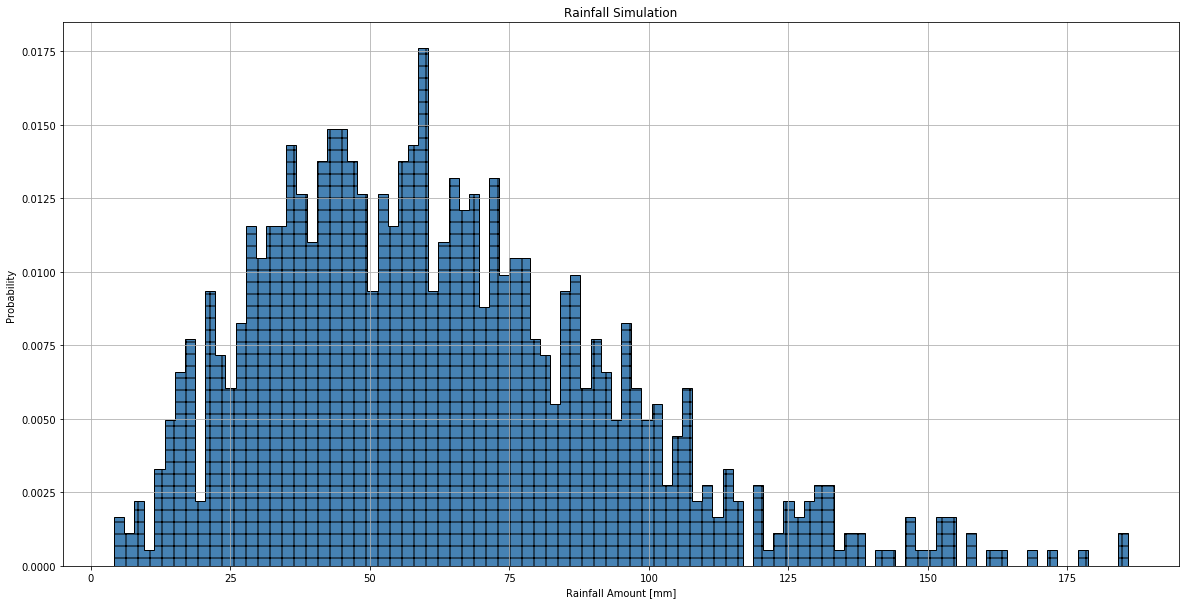

In [12]:
fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='steelblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

### Enero 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  7.568
The elapsed time over simulation is:  30.52528214454651  seconds.


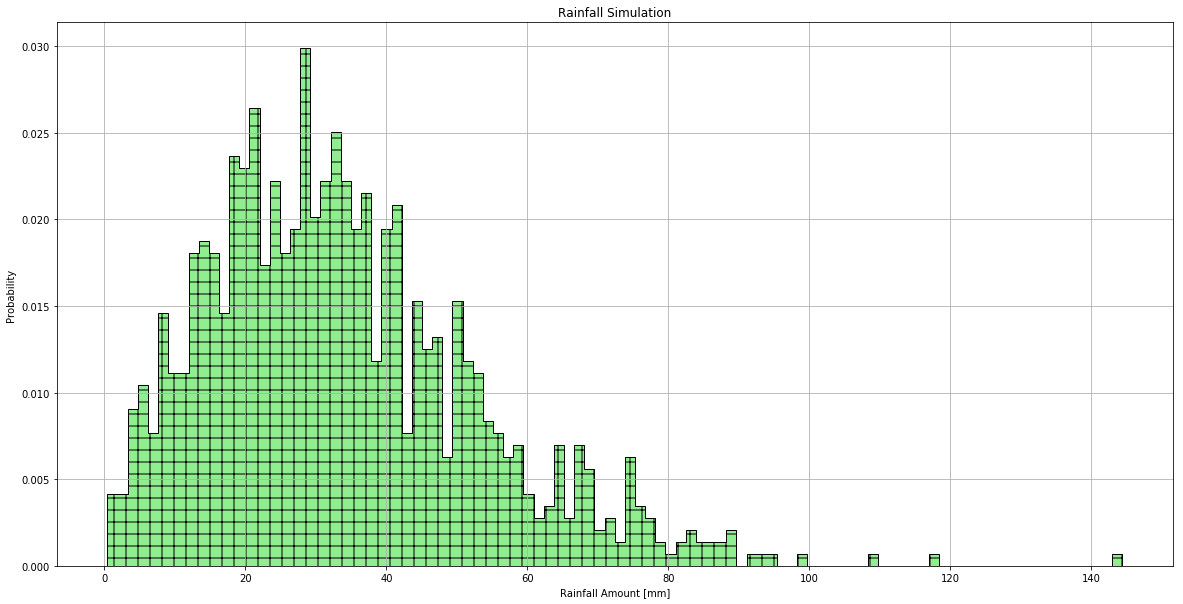

In [13]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-01-01', initialState = 0 , initialPrep =  0.4, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='lightgreen',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  7.601
The elapsed time over simulation is:  27.904995441436768  seconds.


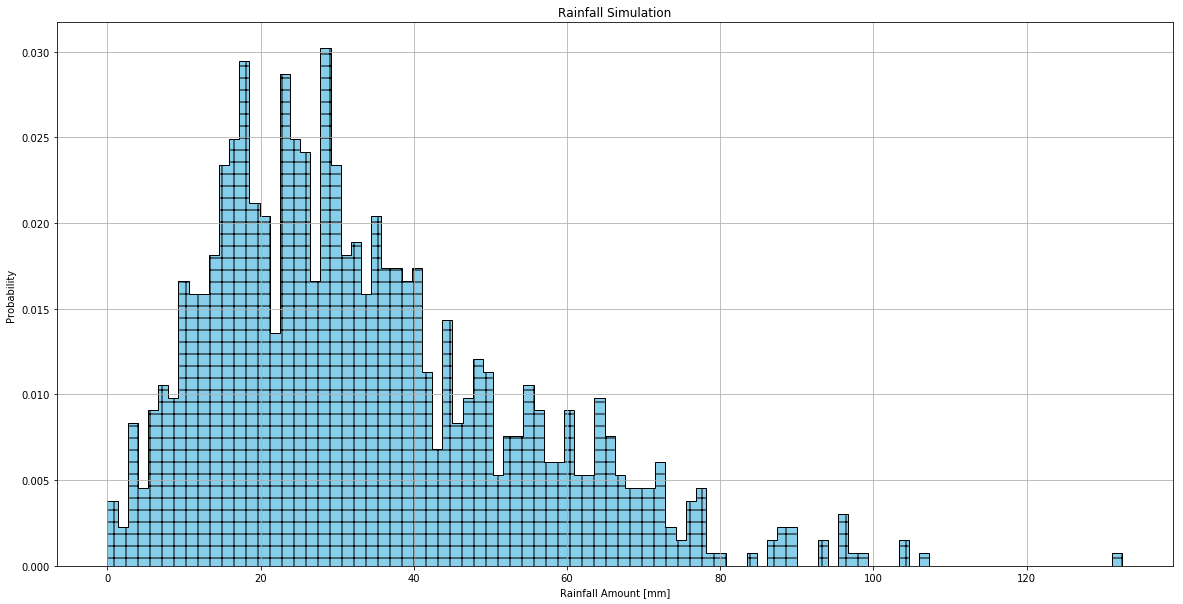

In [14]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-01-01', initialState = 1 , initialPrep =  0.4, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='skyblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  7.684
The elapsed time over simulation is:  29.408092975616455  seconds.


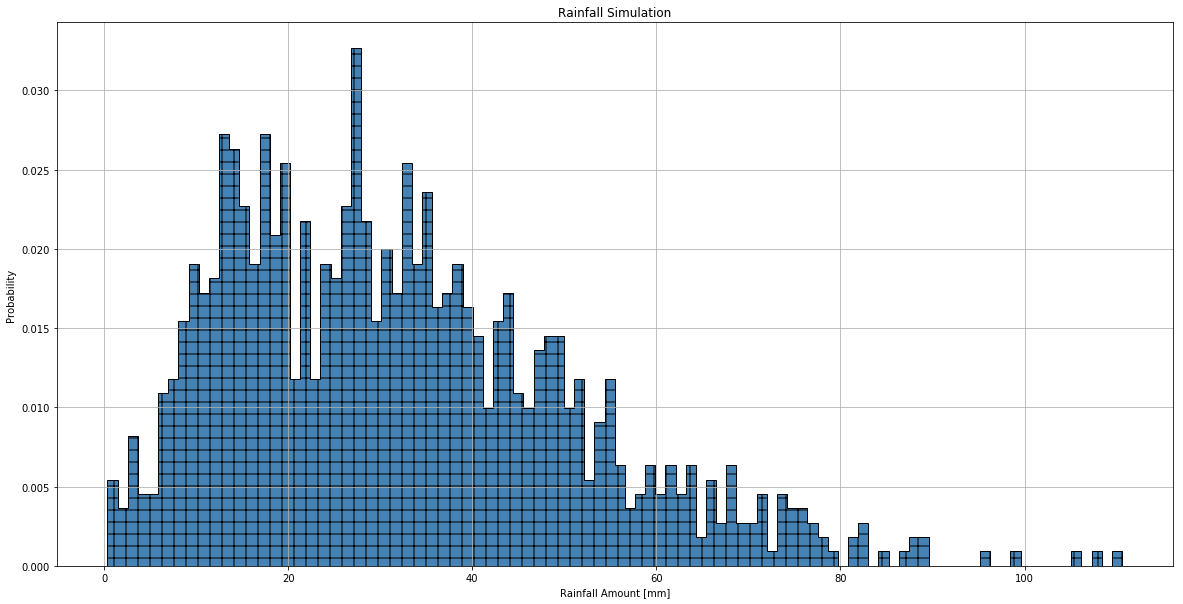

In [15]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-01-01', initialState = 1 , initialPrep =  5.0, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='steelblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

### Abril

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  18.597
The elapsed time over simulation is:  27.486621856689453  seconds.


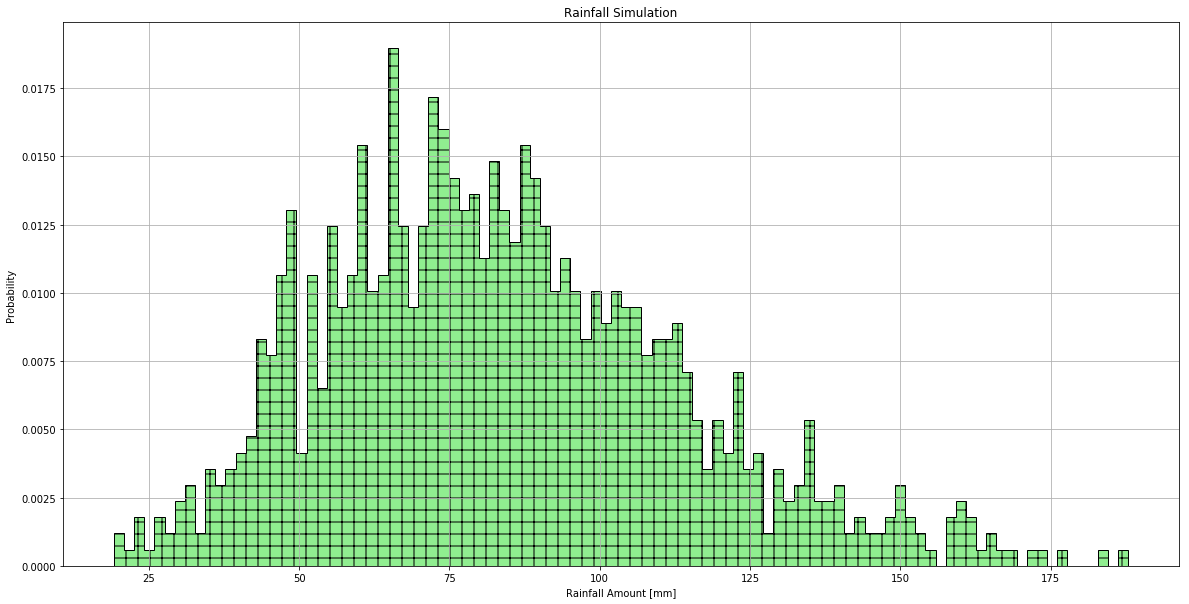

In [16]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-04-01', initialState = 0 , initialPrep =  0.4, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='lightgreen',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  18.522
The elapsed time over simulation is:  28.10468339920044  seconds.


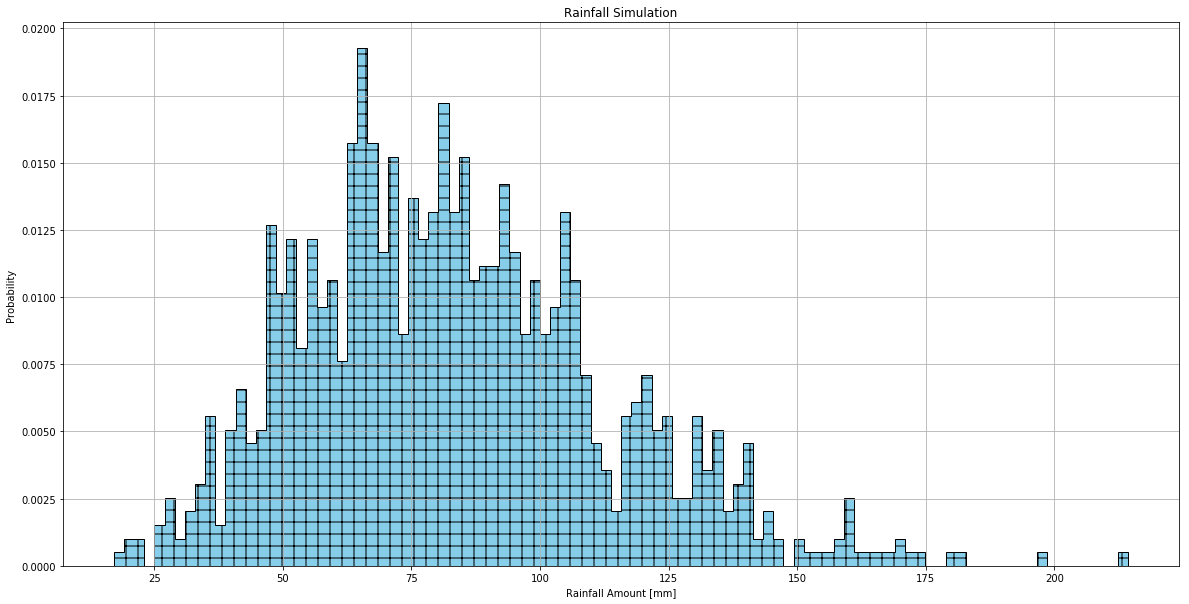

In [17]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-04-01', initialState = 1 , initialPrep =  0.4, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='skyblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  18.677
The elapsed time over simulation is:  29.744093656539917  seconds.


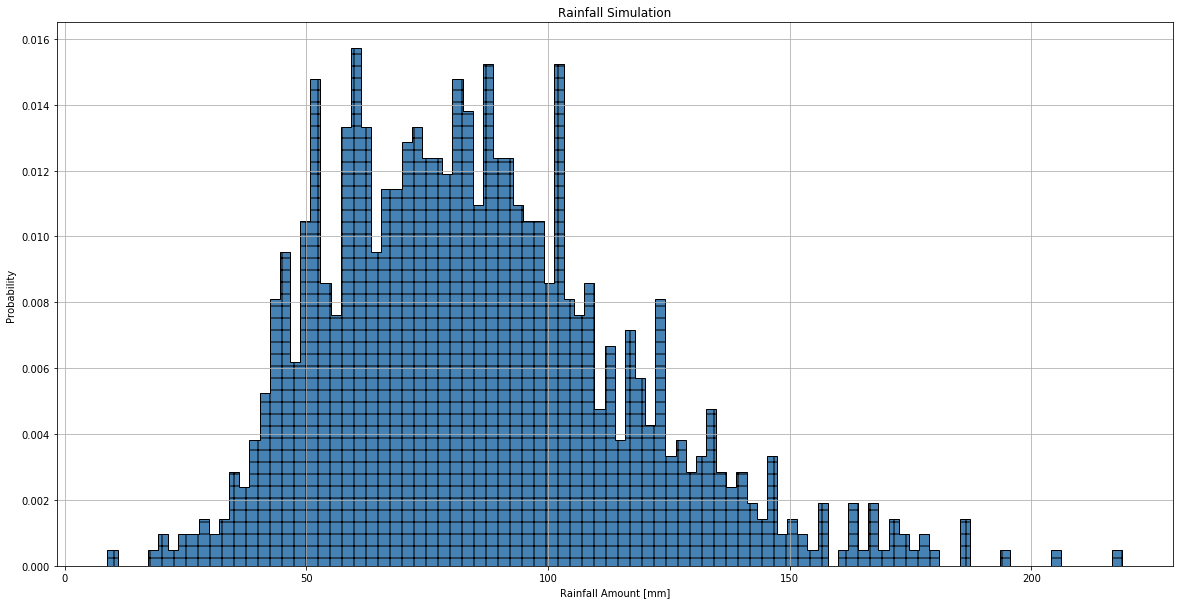

In [18]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-04-01', initialState = 1 , initialPrep =  5.0, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='steelblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

### Octubre

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  21.99
The elapsed time over simulation is:  29.433598279953003  seconds.


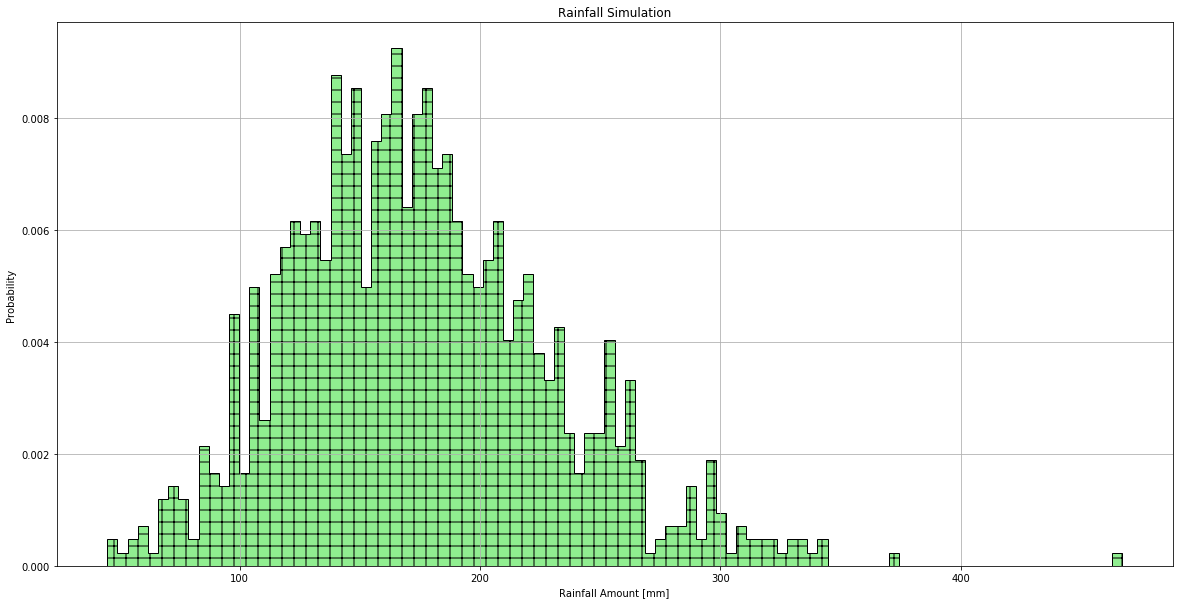

In [19]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-10-01', initialState = 0 , initialPrep =  0.4, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='lightgreen',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  22.269
The elapsed time over simulation is:  29.684463500976562  seconds.


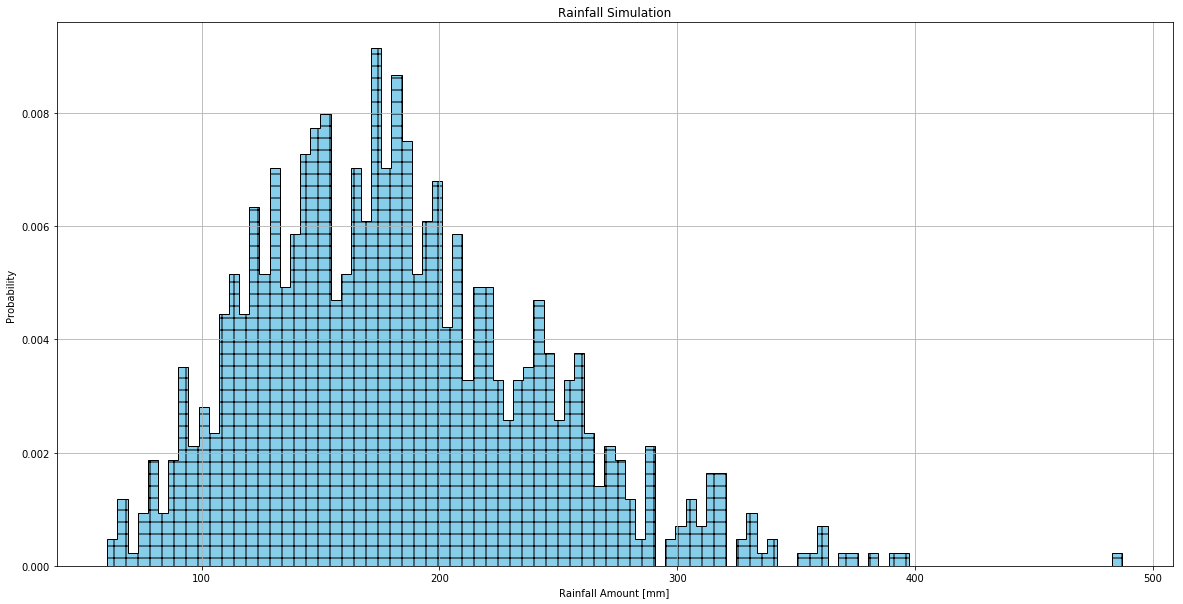

In [20]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-10-01', initialState = 1 , initialPrep =  0.4, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='skyblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  22.216
The elapsed time over simulation is:  33.252840757369995  seconds.


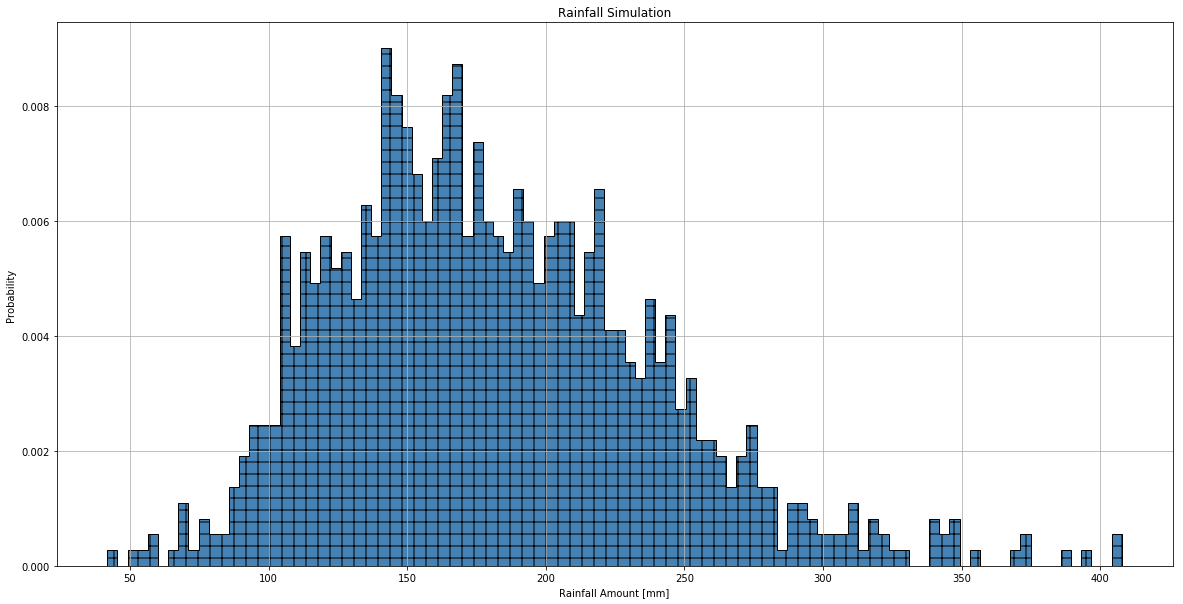

In [21]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2017-10-01', initialState = 1 , initialPrep =  5.0, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='steelblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

# Financial Analysis

In [11]:
def calculatePrice(strikePrice, interestRate, finalSimulationData):
    
    presentValueArray = [0]*len(finalSimulationData)
    
    for i in range(len(finalSimulationData)):
        tempDiff = finalSimulationData[i]-strikePrice
        
        realDiff = max(0,tempDiff)
        
        presentValue = realDiff*np.exp(-interestRate/12)
        
        presentValueArray[i] = presentValue 
    
    print('The option price should be: \n ' , np.mean(presentValueArray))

In [12]:
calculatePrice(50,0.20,finalSimulation)

NameError: name 'finalSimulation' is not defined

## Compare Data

In [13]:
import pickle 
path = '../datasets'
allDataDataframe = pickle.load(open(path+'/fullDataset/completeDailyDataset.pickle','rb'))

In [14]:
allDataDataframe.tail()

,Prep,Month,nino34,probNeutral,probNino,probNina,state,nextState
2015-12-26,0,12,2.43192,0,1,0,0,0
2015-12-27,0,12,2.44873,0,1,0,0,0
2015-12-28,0,12,2.395,0,1,0,0,0
2015-12-29,0,12,2.42051,0,1,0,0,0
2015-12-30,0,12,2.36802,0,1,0,0,0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The mean of wet days is:  19.179
The elapsed time over simulation is:  33.86972665786743  seconds.


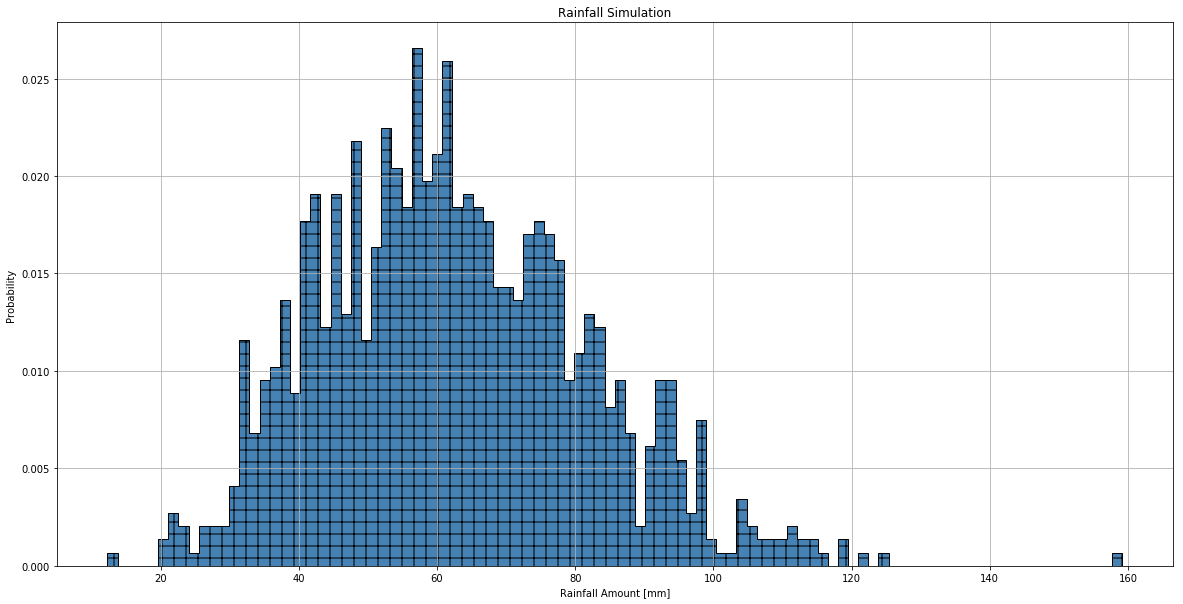

In [26]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Create dataframe to simulate. 
simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2011-08-01', initialState = 1 , initialPrep =  10, ensoForecast = ensoForecast)

# Final Analysis.
finalSimulation = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

fig = plt.figure(figsize=(20, 10))

plt.hist(finalSimulation,facecolor='steelblue',bins=100, density=True,
         histtype='stepfilled', edgecolor = 'black' , hatch = '+')

plt.title('Rainfall Simulation')
plt.xlabel('Rainfall Amount [mm]')
plt.ylabel('Probability ')
plt.grid()
plt.show()

In [27]:
allDataDataframe['2011-08-01':'2011-08-30']['state'].sum()

19

In [28]:
allDataDataframe['2011-08-01':'2011-08-30']['Prep'].sum()

60.2

In [29]:
allDataDataframe.ix['2012-04-01']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Prep                  0
Month                 4
nino34        -0.327419
probNeutral        0.88
probNino           0.02
probNina            0.1
state                 0
nextState             0
Name: 2012-04-01, dtype: object

# Final Results

In [15]:
def plotRainfallDistribution(rainfallSimulated):
  
    # Create Figure.
    fig = plt.figure(figsize=(20, 10))

    # Plot histogram.
    plt.hist(rainfallSimulated,facecolor='steelblue',bins=100, density=True,
           histtype='stepfilled', edgecolor = 'black' , hatch = '+')

    # Add axis names.
    plt.title('Rainfall Simulation')
    plt.xlabel('Rainfall Amount [mm]')
    plt.ylabel('Probability ')
    plt.grid()
    plt.show()

In [16]:
def optionRainfallCalculator(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, optionMonthTerm):
  
    ## Generates initial conditions.
  
    # Defines initial state based on proportions.
    successProbability = 0.5
    initialState = bernoulli.rvs(successProbability) 

    # Calculates initial prepicipitation.
    if initialState == 1:
        initialPrep = 1.0
    else:
        initialPrep = 0.0

    ## Create dataframe to simulate. 
    simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = startDate, initialState = initialState , initialPrep =  initialPrep, ensoForecast = ensoForecast, optionMonthTerm = optionMonthTerm)

    ## Run all iterations.
    rainfallPerIteration = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

    ## Plot histogram.

    plotRainfallDistribution(rainfallPerIteration)

    ## Print Statistics.

    print(stats.describe(rainfallPerIteration))

    return rainfallPerIteration

/home/jesus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  15.579
The elapsed time over simulation is:  73.08679747581482  seconds.


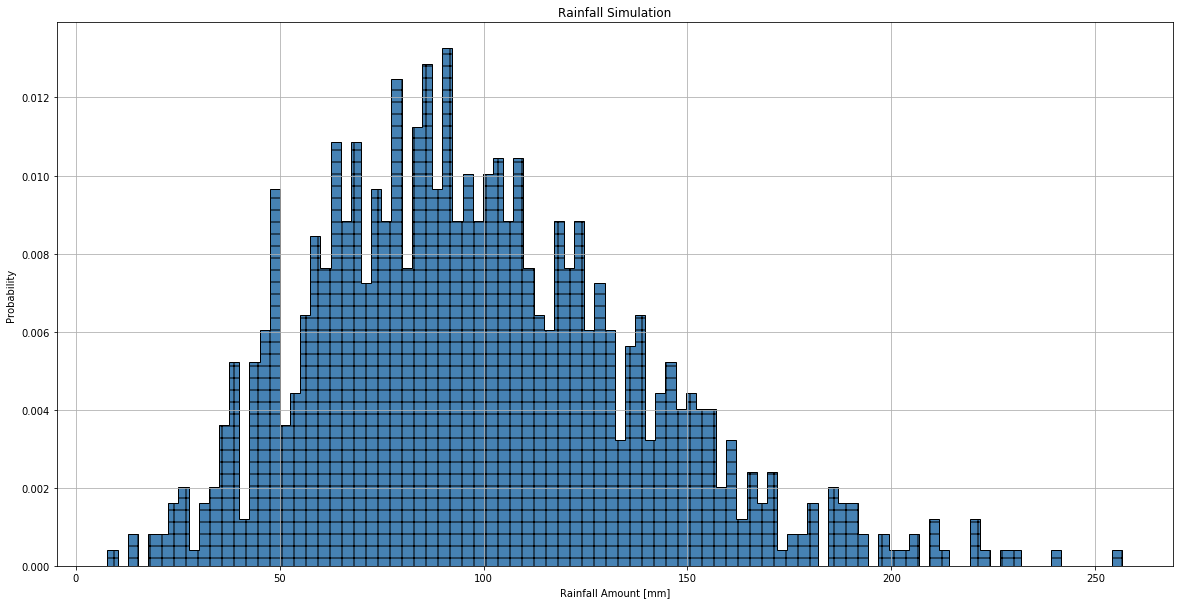

DescribeResult(nobs=1000, minmax=(7.77693052226084, 256.5436755196686), mean=98.47723482318273, variance=1553.1934513535475, skewness=0.6055280873254262, kurtosis=0.42157086519427134)


In [19]:
test = optionRainfallCalculator(iterations=1000,
                              startDate='2012-03-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

# Enero 2015

## Option 1 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  6.294
The elapsed time over simulation is:  26.87258267402649  seconds.


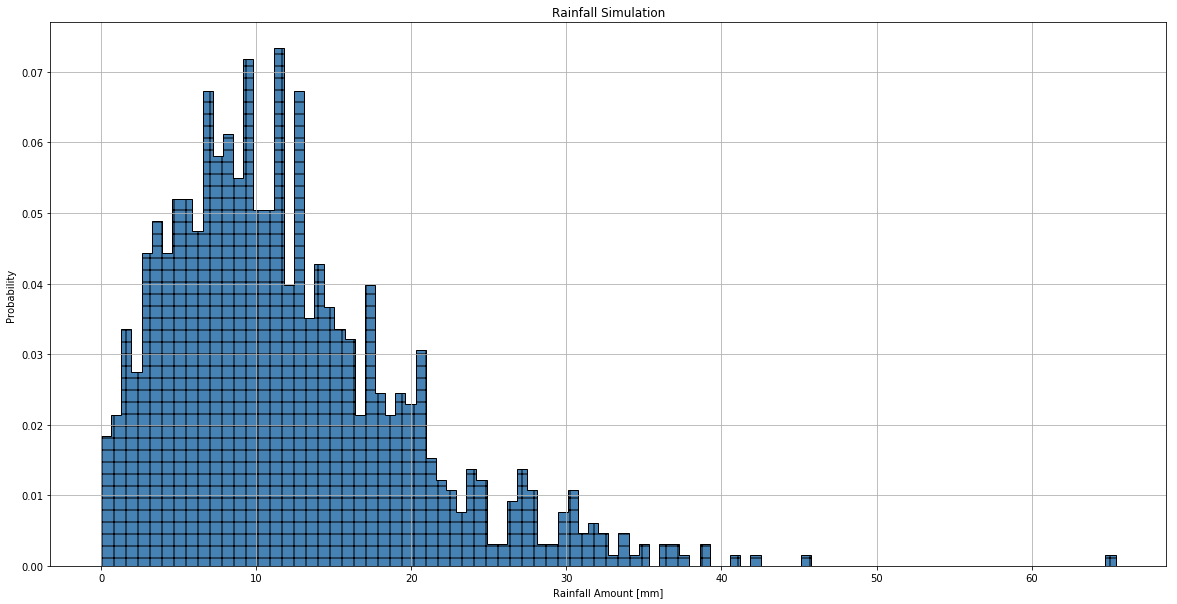

DescribeResult(nobs=1000, minmax=(0.0, 65.41289077205379), mean=12.013512584656004, variance=62.0256295197499, skewness=1.2662493799520107, kurtosis=2.8896496056605976)


In [53]:
january1 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)

## Option 3 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  6.208
The elapsed time over simulation is:  27.610187292099  seconds.


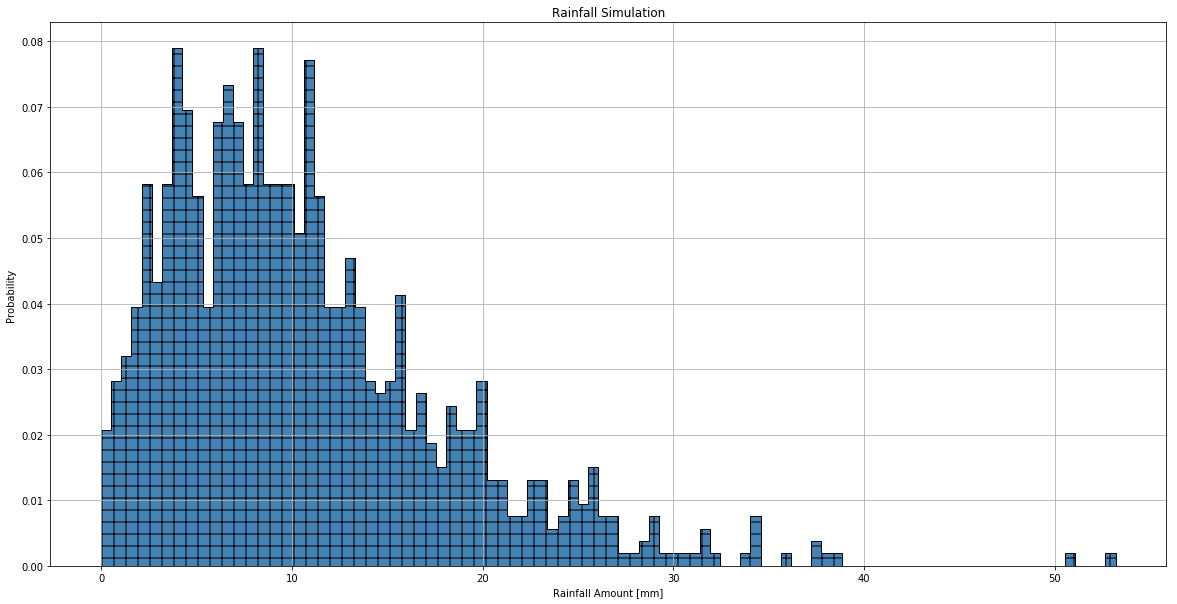

DescribeResult(nobs=1000, minmax=(0.0, 53.18929492652049), mean=10.595005391166618, variance=53.04902663075247, skewness=1.3152150532985494, kurtosis=2.721023489846064)


In [54]:
january3 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

## Option 6 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  6.267
The elapsed time over simulation is:  26.831899642944336  seconds.


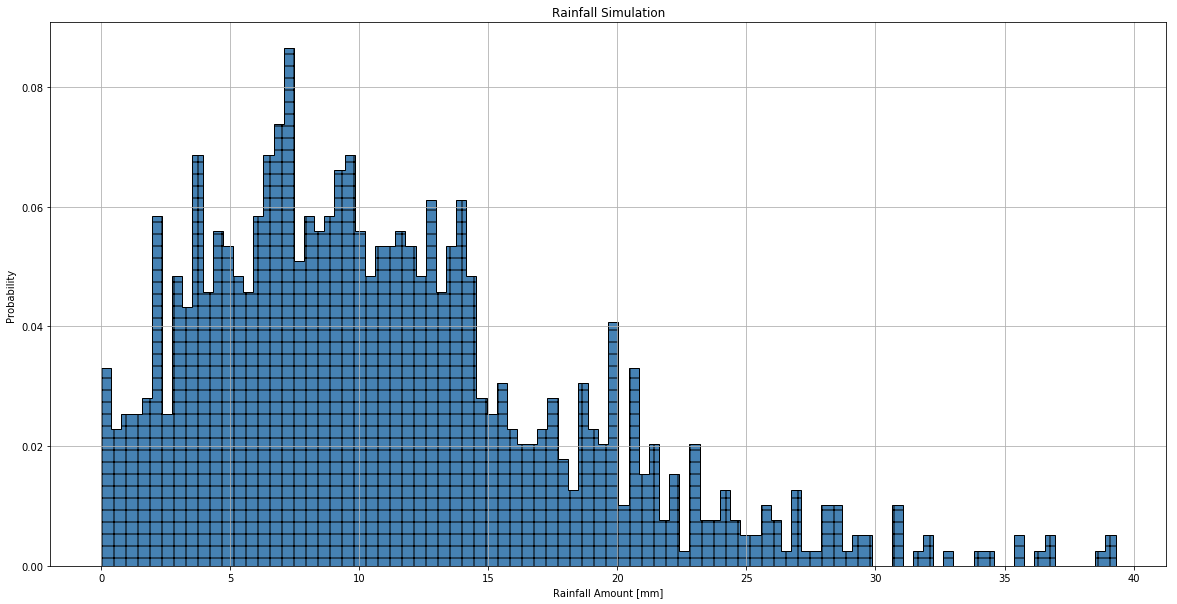

DescribeResult(nobs=1000, minmax=(0.0, 39.30158282973666), mean=11.085562145878066, variance=50.95028720637085, skewness=0.993052210427178, kurtosis=1.0696074972803444)


In [56]:
january6 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 6)

## Option 9 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  6.573
The elapsed time over simulation is:  25.51637101173401  seconds.


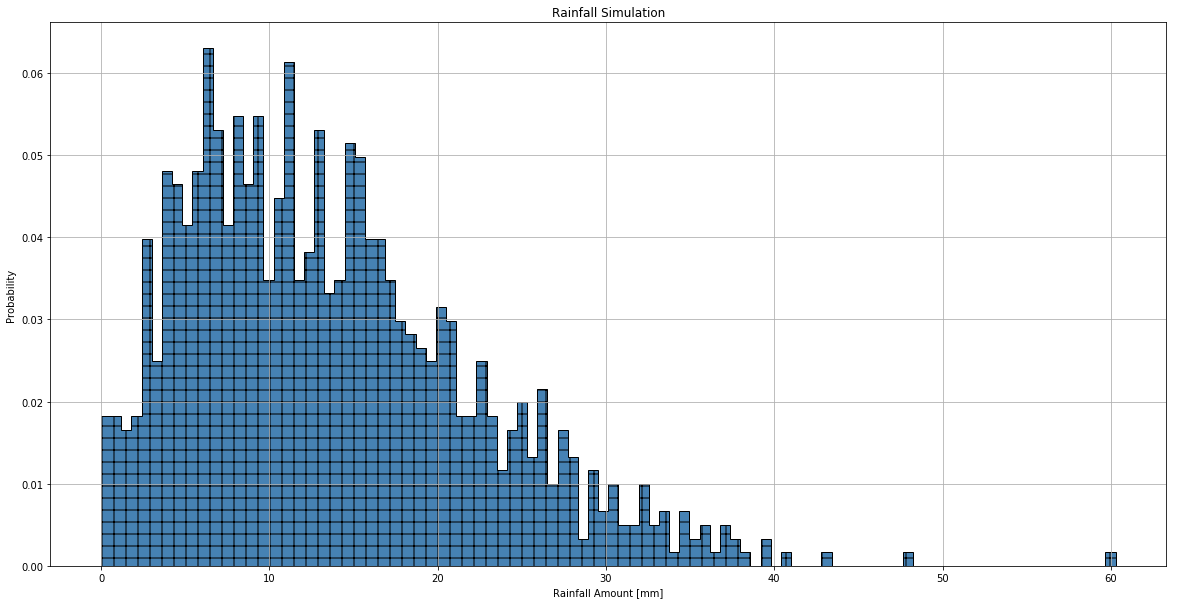

DescribeResult(nobs=1000, minmax=(0.0, 60.27821745622549), mean=13.692495445951105, variance=72.92230926602927, skewness=0.8841621052156912, kurtosis=0.9498992134016748)


In [57]:
january9 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 9)

# April 2015

## Option 1 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.255
The elapsed time over simulation is:  27.723010301589966  seconds.


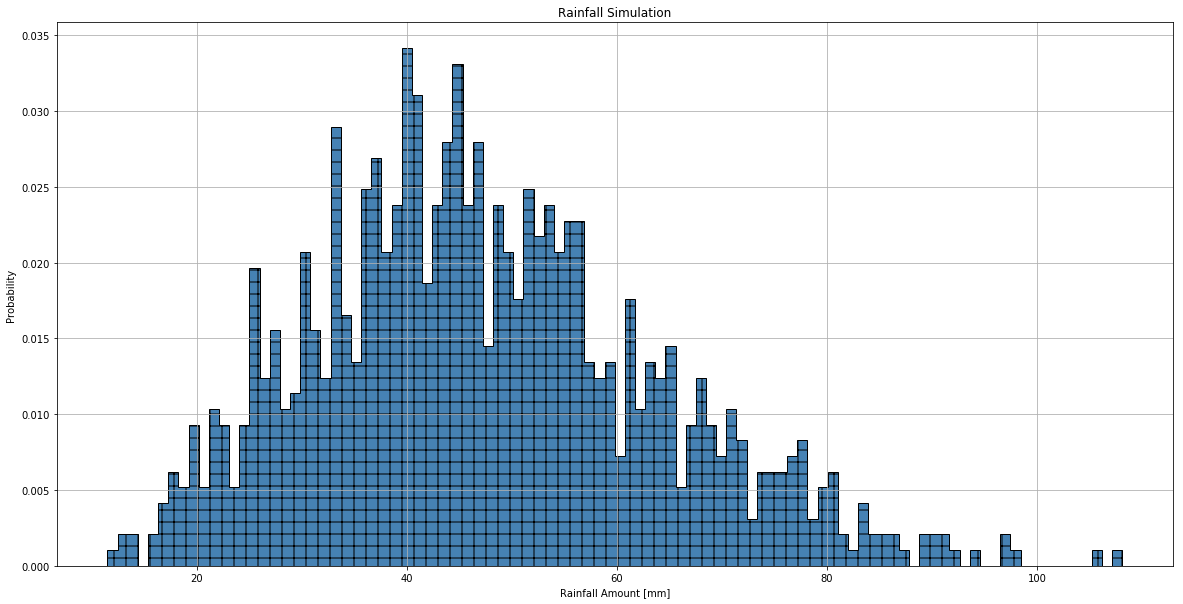

DescribeResult(nobs=1000, minmax=(11.469263595617551, 108.08881830538753), mean=47.274989204590455, variance=264.6024849992948, skewness=0.4835097285801066, kurtosis=0.07890783714268457)


In [58]:
april1 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)

## Option 3 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.434
The elapsed time over simulation is:  30.191760540008545  seconds.


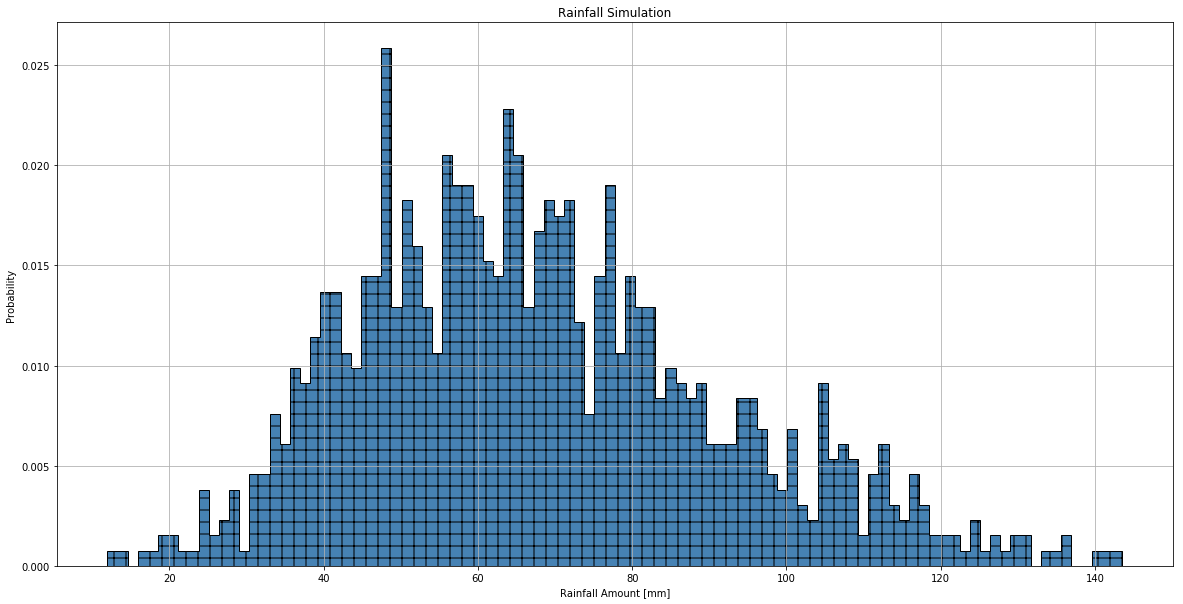

DescribeResult(nobs=1000, minmax=(11.96572121995529, 143.49652496643938), mean=67.71528602384187, variance=549.564948510138, skewness=0.5291649614800319, kurtosis=-0.012942252367525775)


In [59]:
april3 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

## Option 6 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.403
The elapsed time over simulation is:  28.526044845581055  seconds.


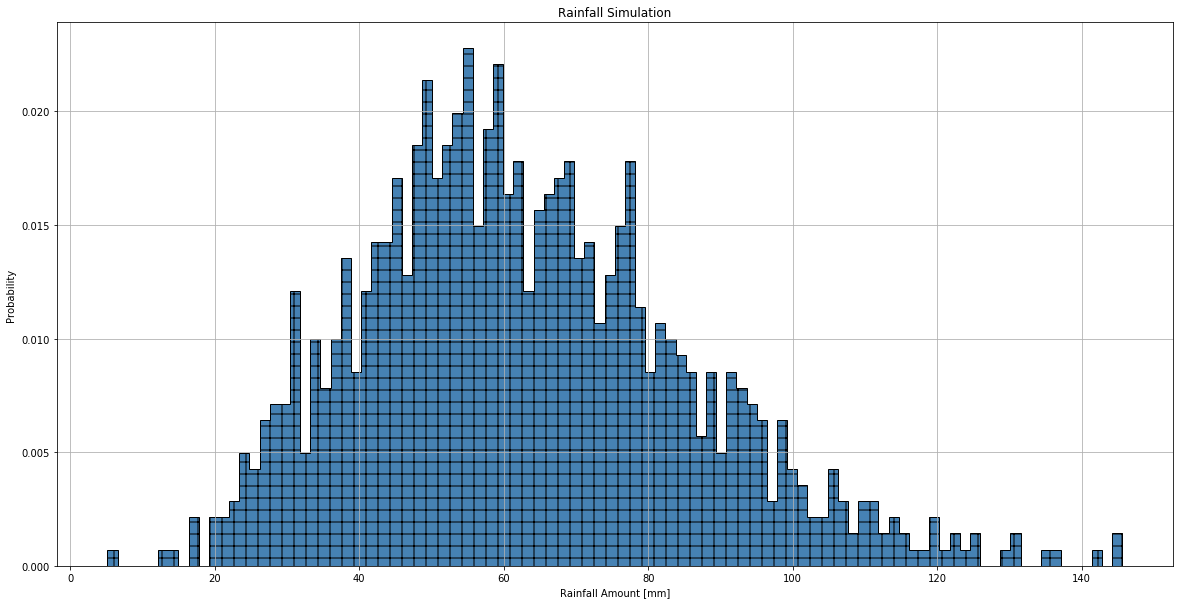

DescribeResult(nobs=1000, minmax=(5.15798395544524, 145.5601051739242), mean=62.777991463955594, variance=506.5476260338465, skewness=0.5453422608056271, kurtosis=0.30693814305530065)


In [61]:
april6 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 6)

## Option 9 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.621
The elapsed time over simulation is:  29.4127516746521  seconds.


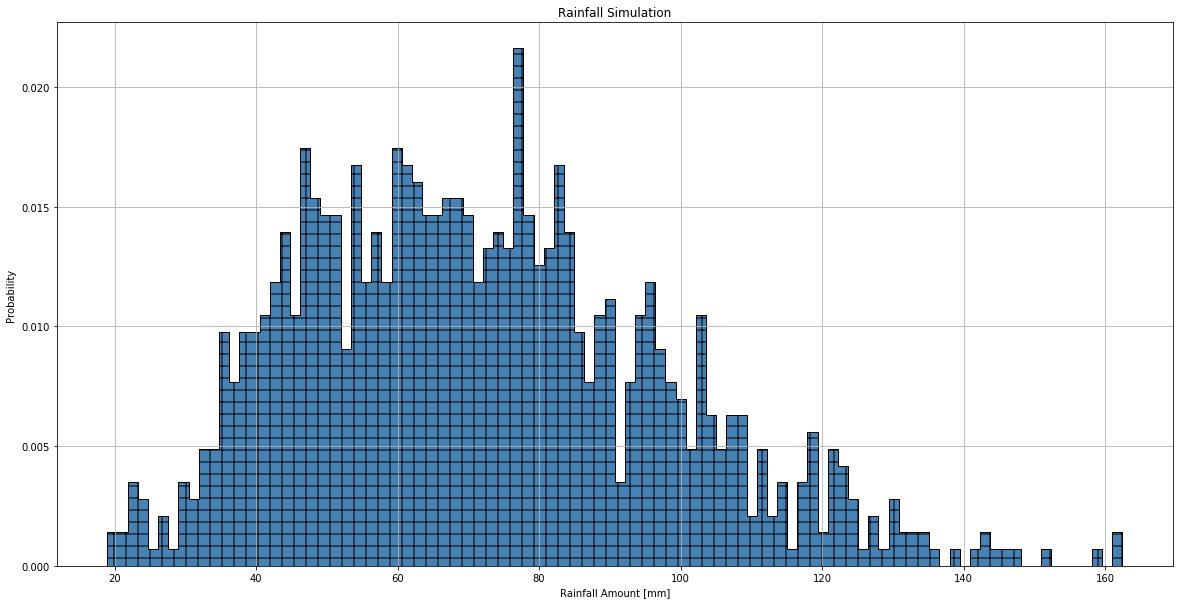

DescribeResult(nobs=1000, minmax=(18.990779109660615, 162.3879878895919), mean=71.66688790362119, variance=641.229455993275, skewness=0.5343163387522598, kurtosis=0.07317525400624003)


In [60]:
april9 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 9)

# October 2015

## Option 1 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  16.682
The elapsed time over simulation is:  29.71963667869568  seconds.


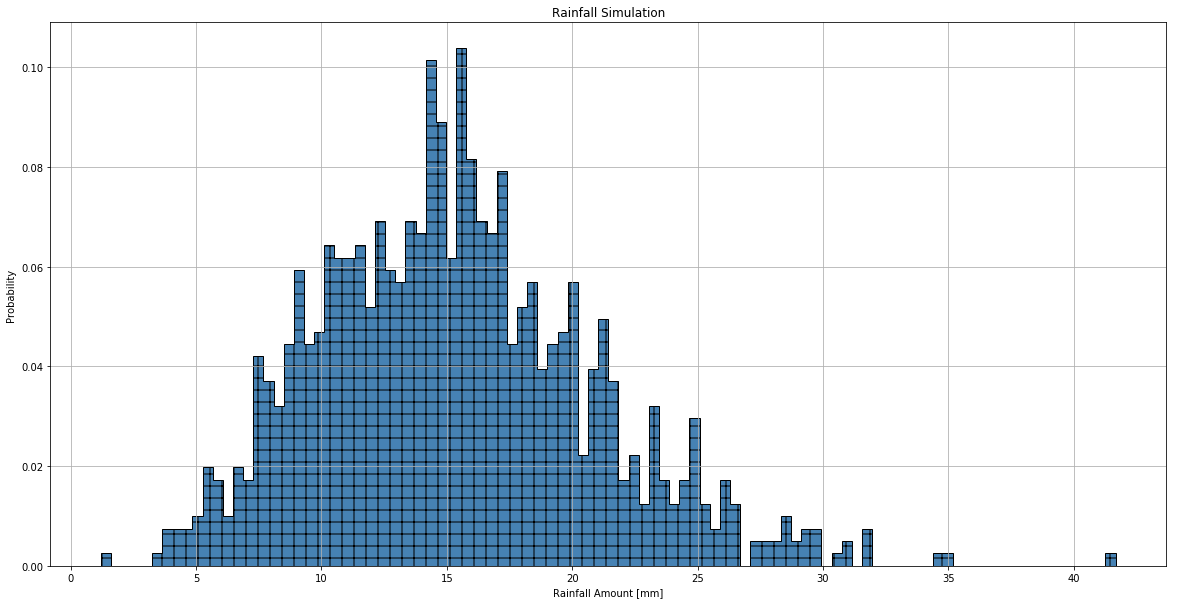

DescribeResult(nobs=1000, minmax=(1.2090016332701987, 41.671505837114545), mean=15.304363777230051, variance=29.940834551698337, skewness=0.5393269666643348, kurtosis=0.5661539195638148)


In [62]:
october1 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-08-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)

## Option 3 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  16.698
The elapsed time over simulation is:  27.839044332504272  seconds.


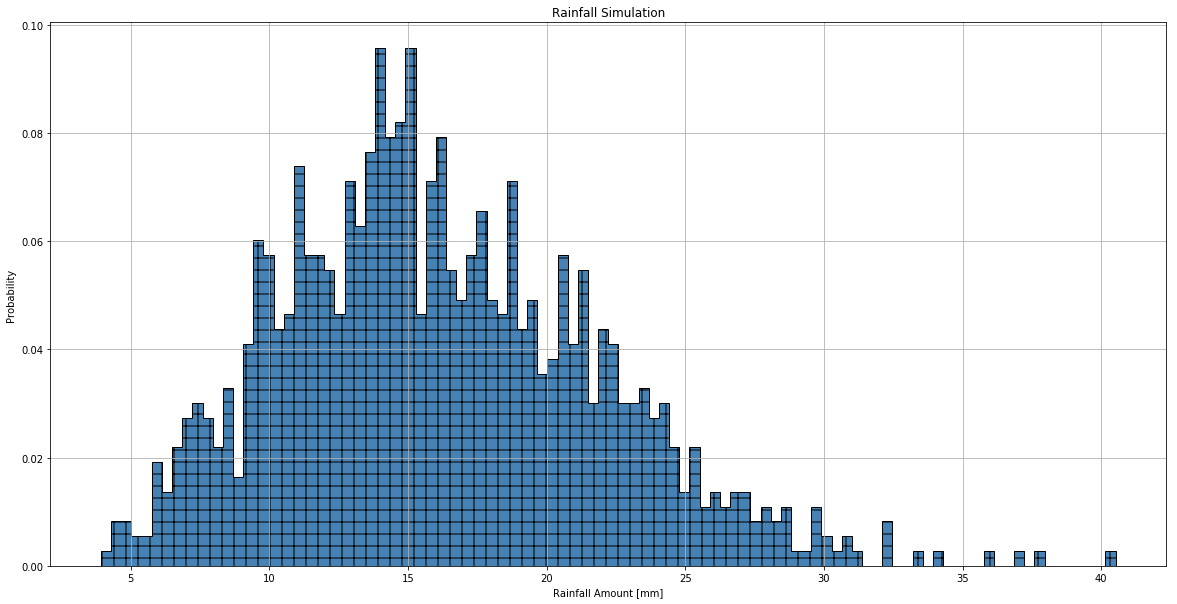

DescribeResult(nobs=1000, minmax=(3.929646196695057, 40.518246379959855), mean=16.152601252827207, variance=32.497754077020964, skewness=0.5333080583385194, kurtosis=0.33379934357490937)


In [63]:
october3 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-08-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

## Option 6 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  17.419
The elapsed time over simulation is:  26.58389711380005  seconds.


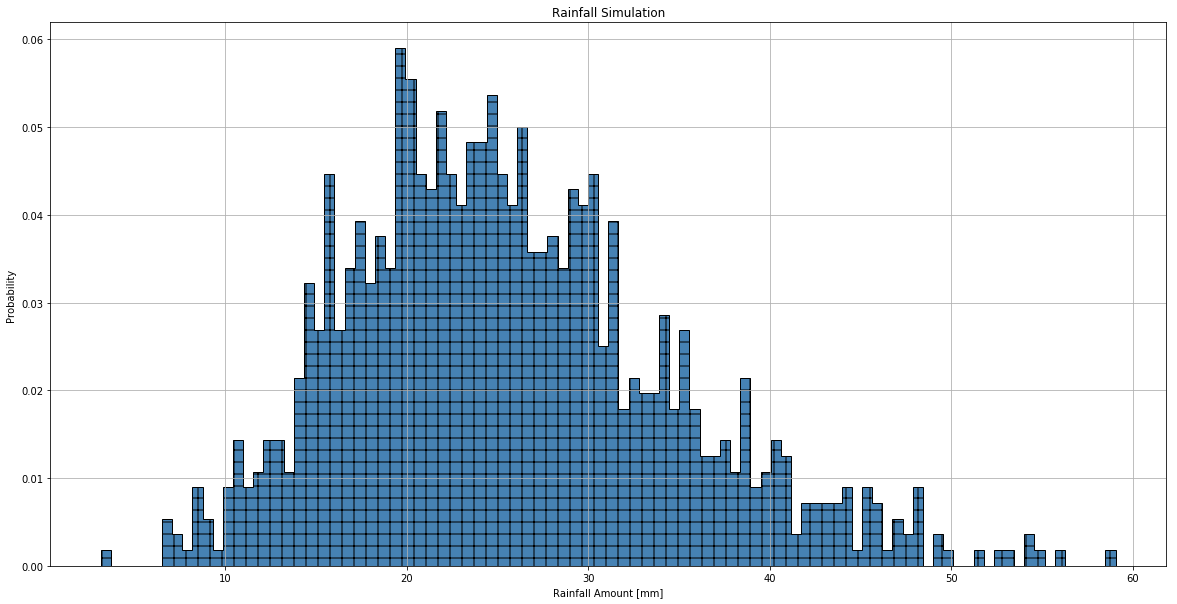

DescribeResult(nobs=1000, minmax=(3.1450064084726934, 59.06078725693423), mean=25.571823499836313, variance=78.5373146649739, skewness=0.5889258982223422, kurtosis=0.33066022460586364)


In [66]:
october6 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-08-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 6)

## Option 9 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  17.913
The elapsed time over simulation is:  26.824491500854492  seconds.


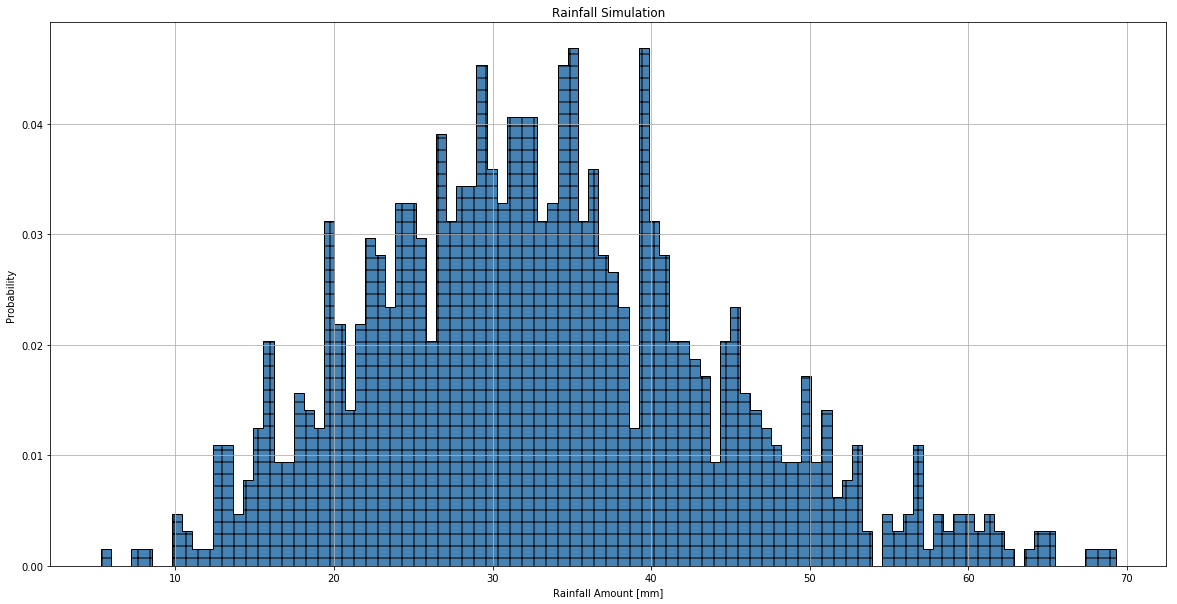

DescribeResult(nobs=1000, minmax=(5.304588909199246, 69.3058388104158), mean=33.256366278889374, variance=121.85599266660203, skewness=0.4180128116060447, kurtosis=0.05692256667133133)


In [65]:
october9 = optionRainfallCalculator(iterations=1000,
                              startDate='2015-08-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 9)

# Enero 2014

## Option 1 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  7.454
The elapsed time over simulation is:  27.973952054977417  seconds.


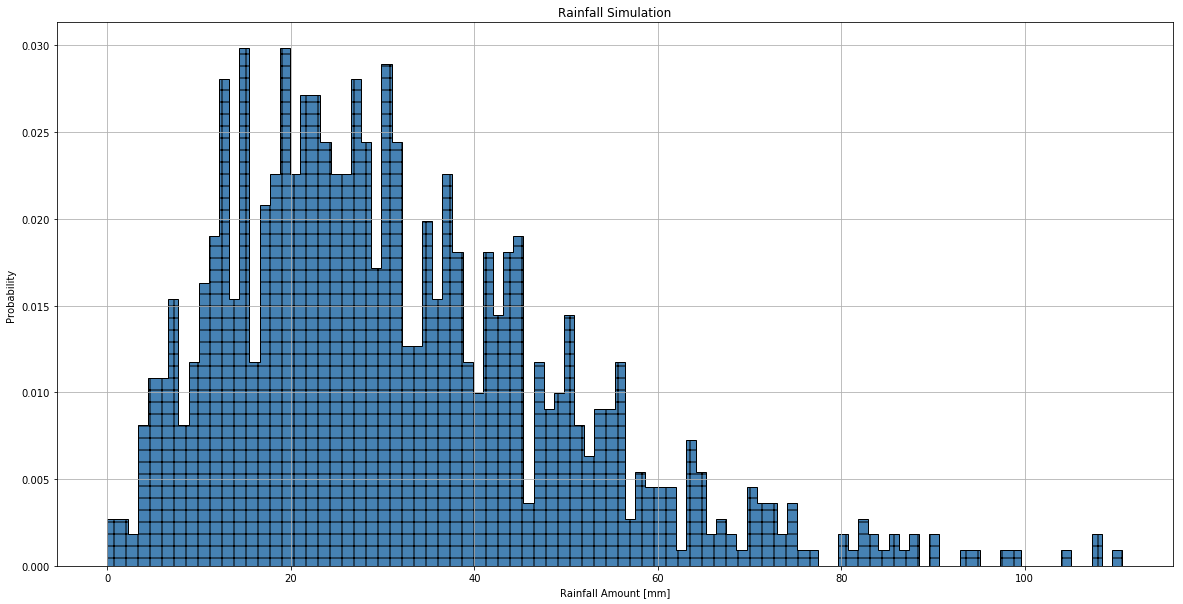

DescribeResult(nobs=1000, minmax=(0.0, 110.5978760647771), mean=31.634693650750187, variance=344.25277279211156, skewness=1.0280841696609986, kurtosis=1.3234989062948967)


In [69]:
january1 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)

## Option 3 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  7.392
The elapsed time over simulation is:  28.50020146369934  seconds.


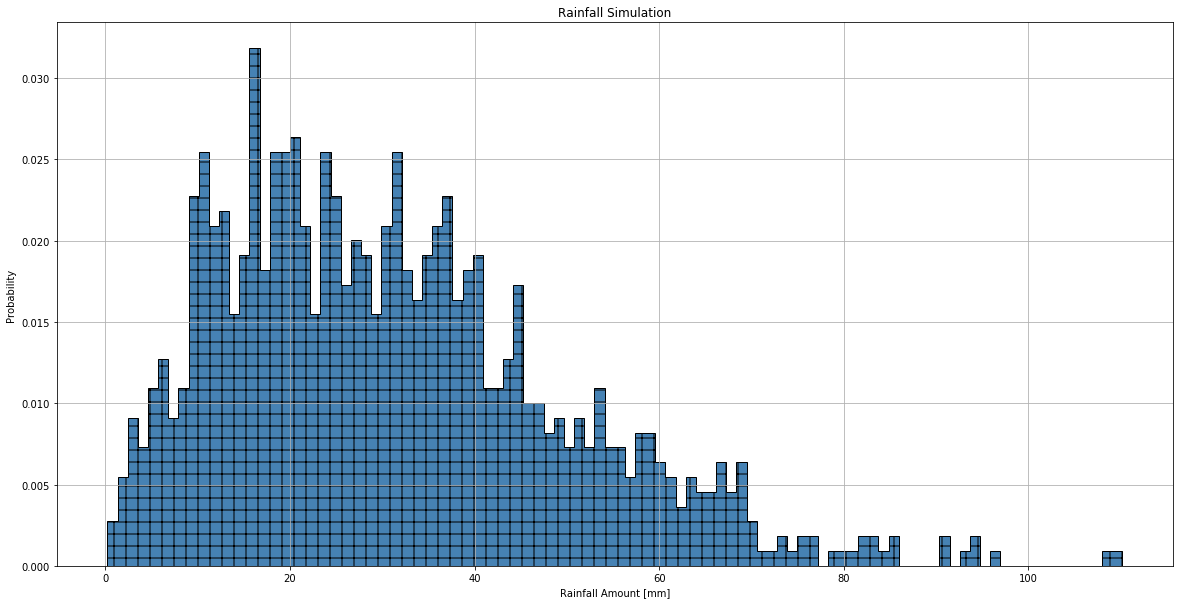

DescribeResult(nobs=1000, minmax=(0.23611513161587974, 110.13200287109166), mean=31.164304510276732, variance=341.8186489140625, skewness=0.8477582042644565, kurtosis=0.6827562192329419)


In [70]:
january3 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

## Option 6 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  7.441
The elapsed time over simulation is:  29.34086775779724  seconds.


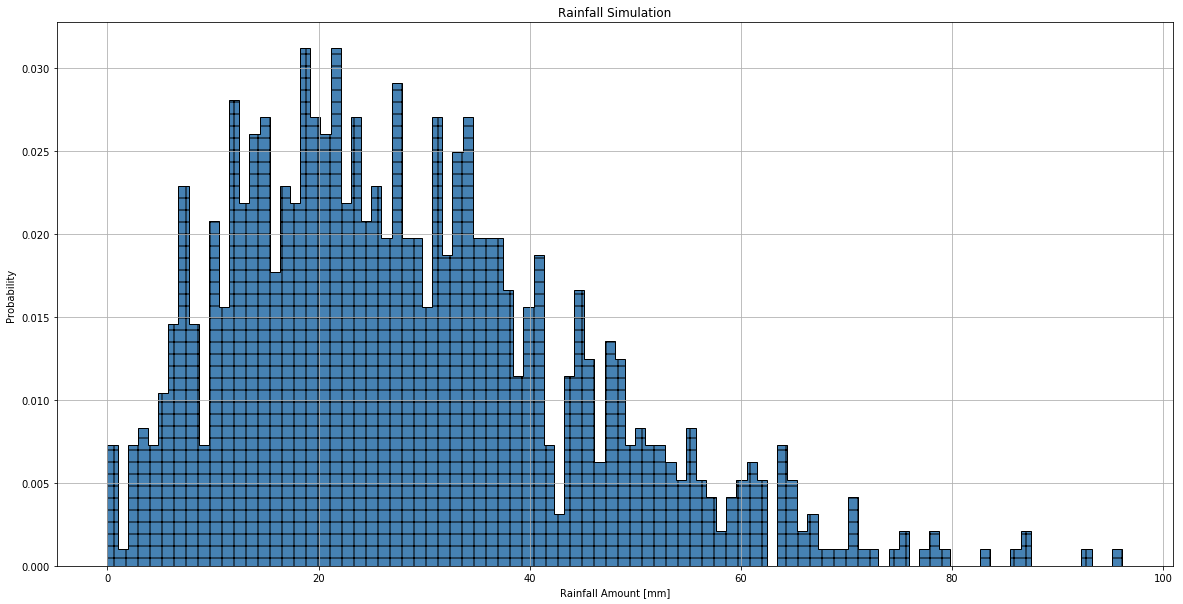

DescribeResult(nobs=1000, minmax=(0.0, 96.09008506818677), mean=28.75385176044028, variance=272.08487124079016, skewness=0.7992983410776482, kurtosis=0.5883342784963355)


In [71]:
january6 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 6)

## Option 9 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  7.677
The elapsed time over simulation is:  30.16532254219055  seconds.


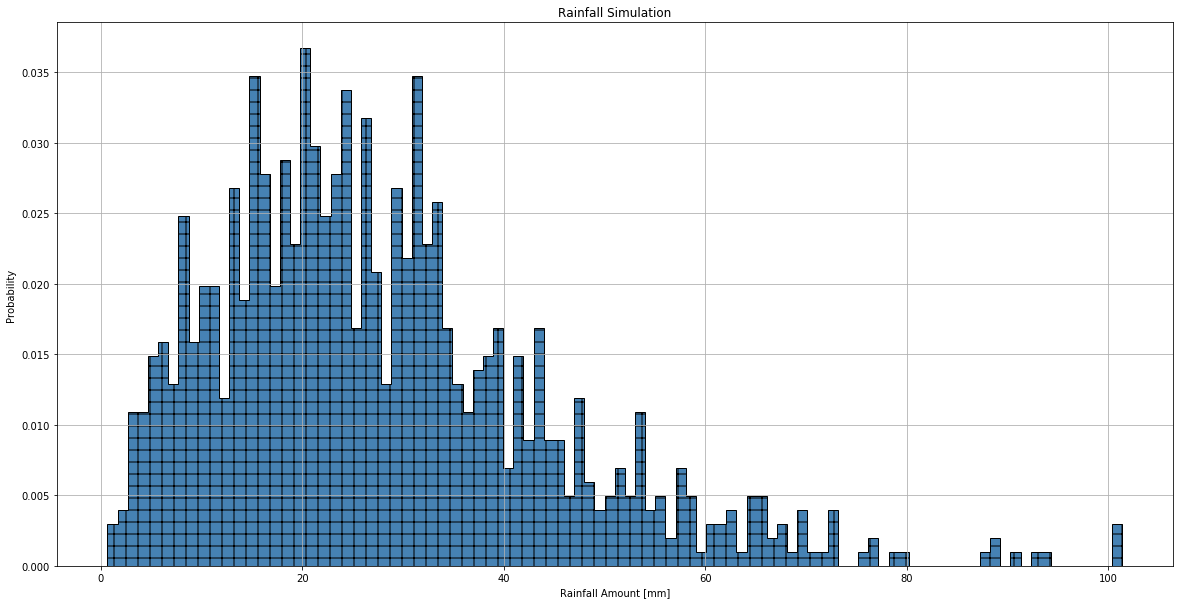

DescribeResult(nobs=1000, minmax=(0.643773691611808, 101.3787349645055), mean=27.890454633345108, variance=278.5576842535156, skewness=1.1067477458110957, kurtosis=1.7112071100027055)


In [72]:
january9 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 9)

# April 2014

## Option 1 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.641
The elapsed time over simulation is:  27.37493395805359  seconds.


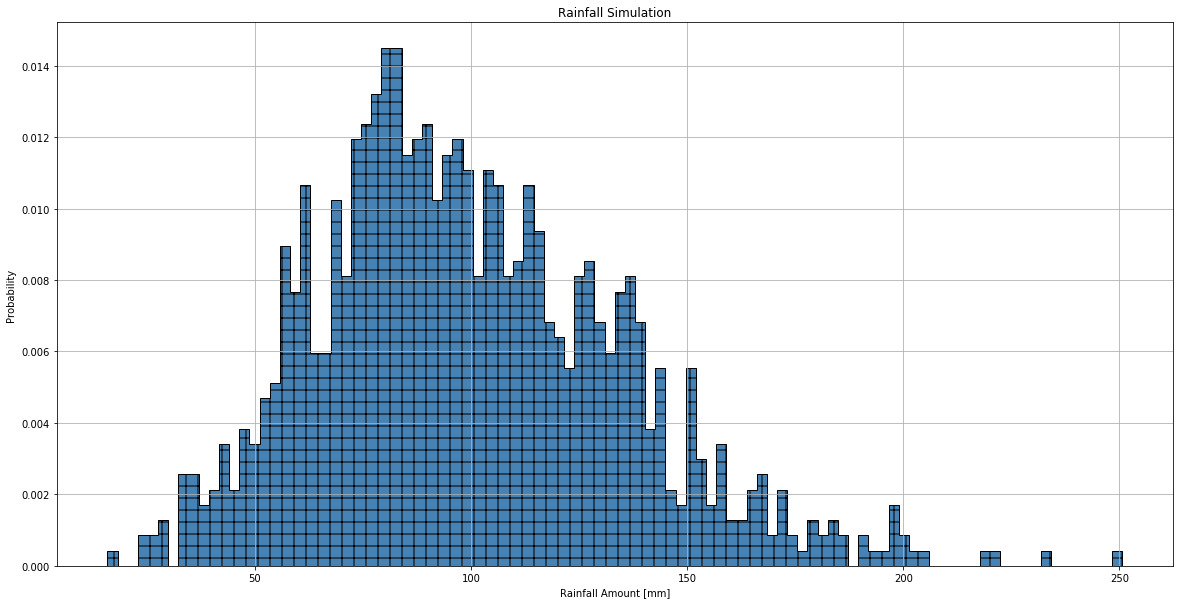

DescribeResult(nobs=1000, minmax=(15.958859519124477, 250.57694007564479), mean=99.23379899531105, variance=1222.1063557525604, skewness=0.5906570137390043, kurtosis=0.5012987371885314)


In [73]:
april1 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)

## Option 3 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.955
The elapsed time over simulation is:  31.590696096420288  seconds.


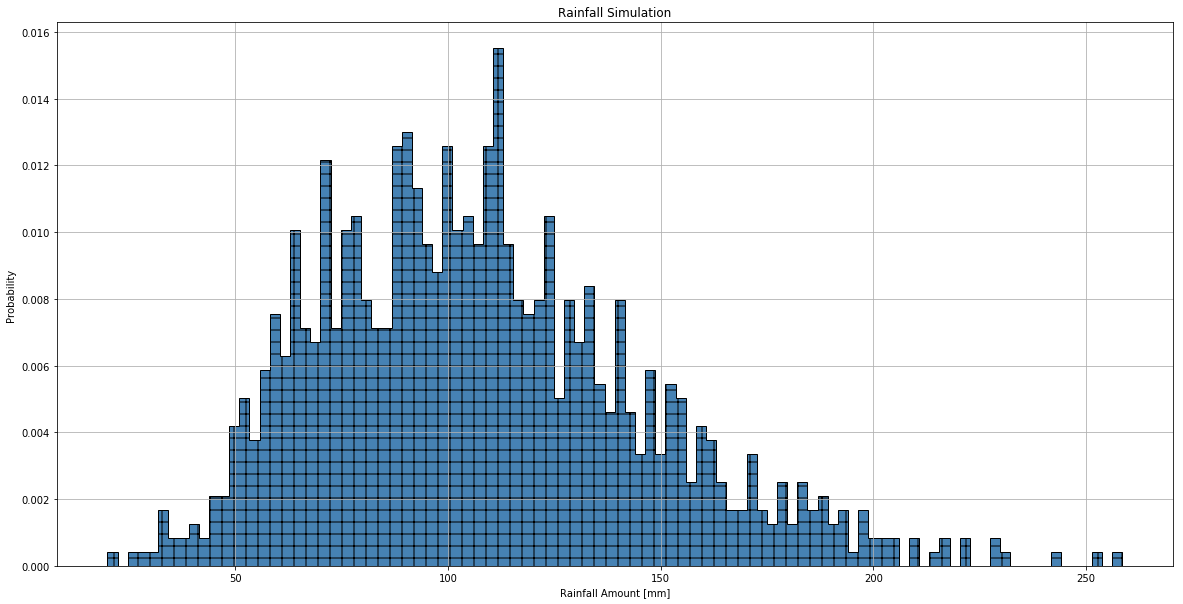

DescribeResult(nobs=1000, minmax=(19.966696352923687, 258.45134747955075), mean=107.53188835464752, variance=1458.4183429623242, skewness=0.6470502962615002, kurtosis=0.4277857364162201)


In [74]:
april3 = optionRainfallCalculator(iterations=1000,
                              startDate='2017-01-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

## Option 6 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  19.097
The elapsed time over simulation is:  27.277865171432495  seconds.


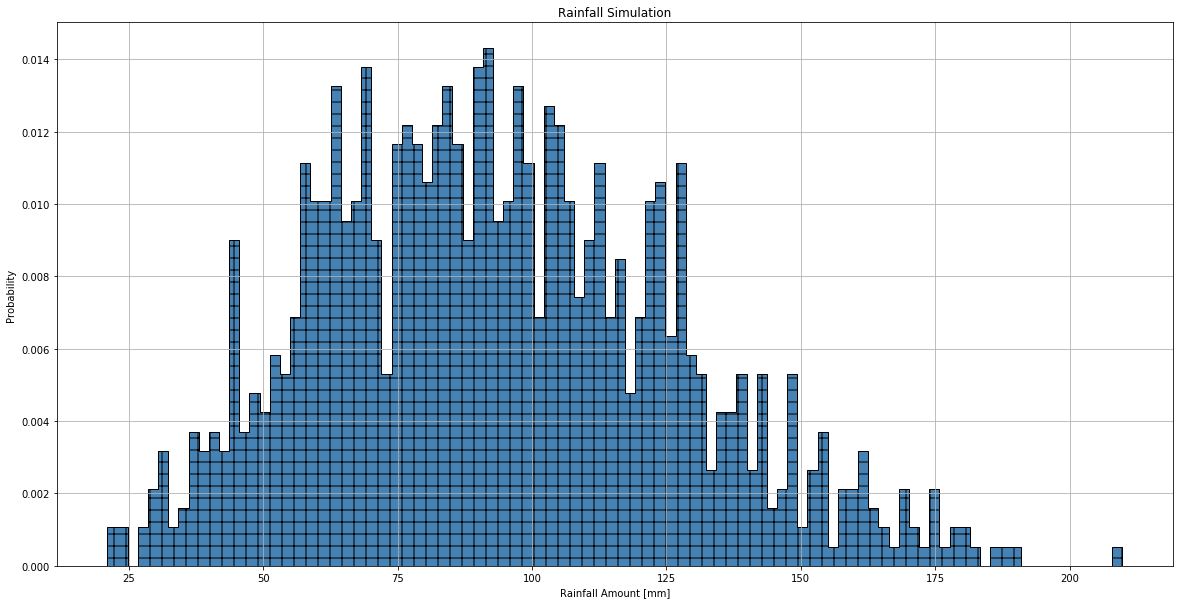

DescribeResult(nobs=1000, minmax=(21.047003923619794, 209.72129439124598), mean=93.53883798491509, variance=1073.6184677687143, skewness=0.3772556834203686, kurtosis=-0.1775130753824854)


In [75]:
april6 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 6)

## Option 9 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  19.115
The elapsed time over simulation is:  28.04730200767517  seconds.


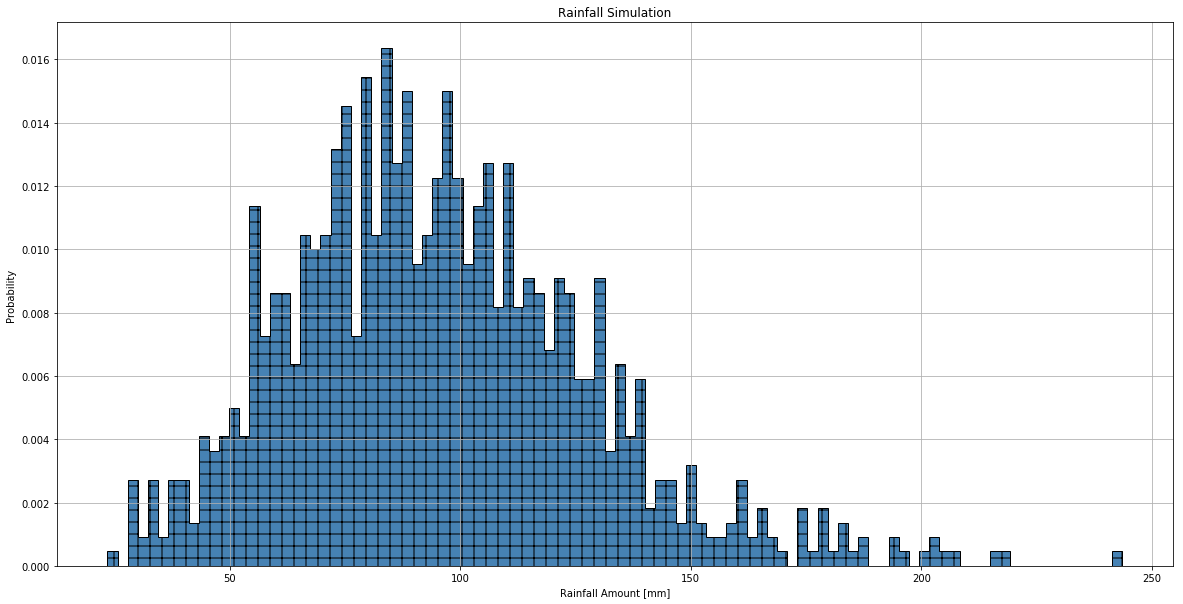

DescribeResult(nobs=1000, minmax=(23.46779694105434, 243.54766867514252), mean=95.44440177083217, variance=1068.7822053632033, skewness=0.684395836484943, kurtosis=0.9205369435359398)


In [76]:
april9 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 9)

# October 2014

## Option 1 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  17.05
The elapsed time over simulation is:  28.434319734573364  seconds.


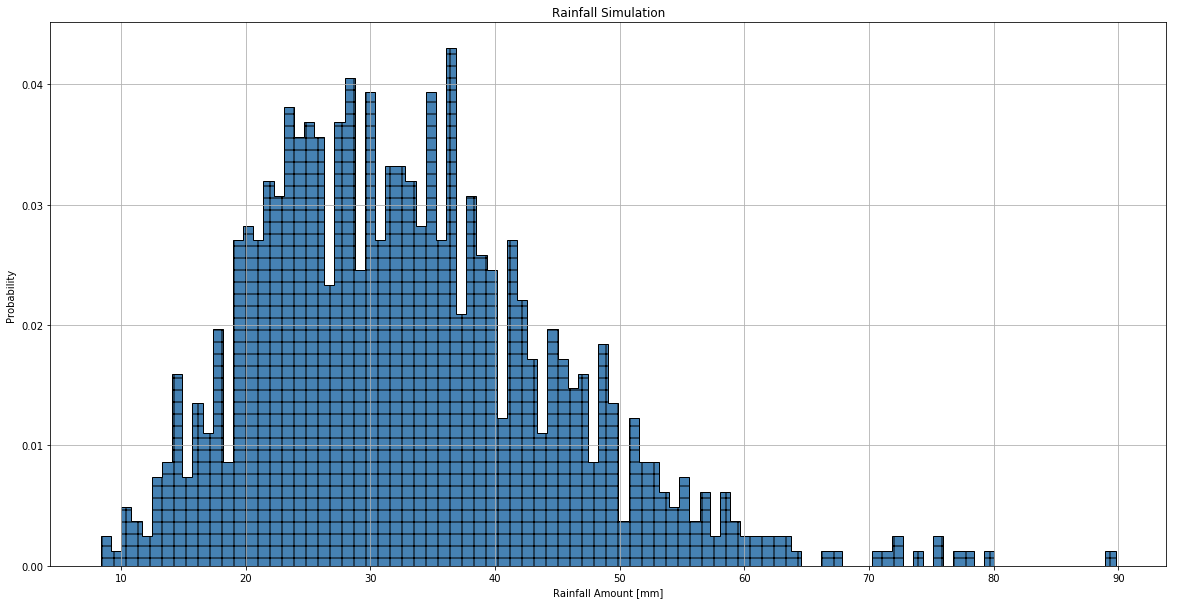

DescribeResult(nobs=1000, minmax=(8.401026053485266, 89.7826227961291), mean=33.08650031787789, variance=142.52081529513842, skewness=0.7829707357582499, kurtosis=1.0253813396056453)


In [77]:
october1 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-08-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)

## Option 3 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  16.952
The elapsed time over simulation is:  31.456610679626465  seconds.


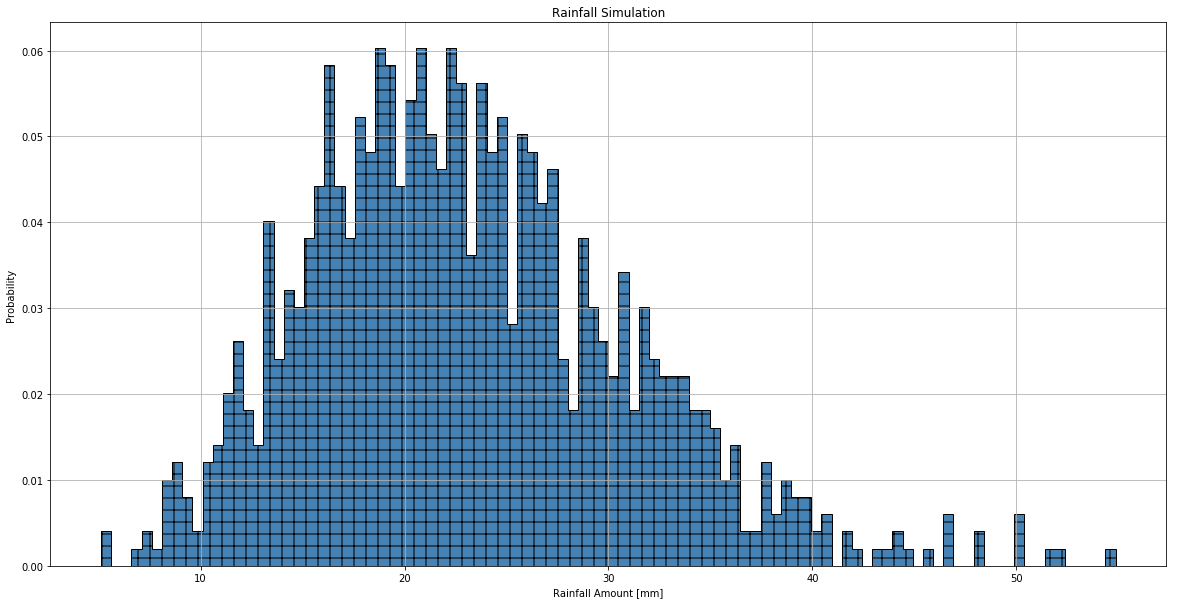

DescribeResult(nobs=1000, minmax=(5.113052350066057, 54.87574085888891), mean=23.115657767977254, variance=61.21032274464698, skewness=0.6407544116277006, kurtosis=0.6094502457883095)


In [78]:
october3 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-08-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 3)

## Option 6 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  18.95
The elapsed time over simulation is:  28.412769317626953  seconds.


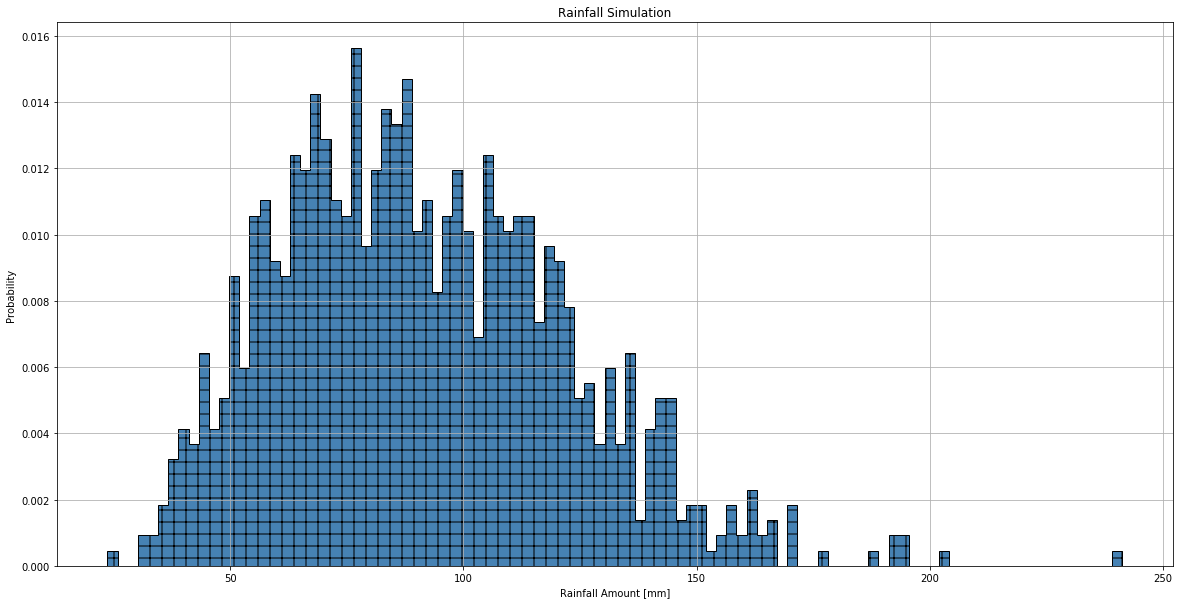

DescribeResult(nobs=1000, minmax=(23.719648780192756, 241.1909607361869), mean=91.30336844294698, variance=944.1100128561277, skewness=0.5797660181736843, kurtosis=0.4356044863939381)


In [81]:
october6 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 6)

## Option 9 Month 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The mean of wet days is:  19.124
The elapsed time over simulation is:  27.809529542922974  seconds.


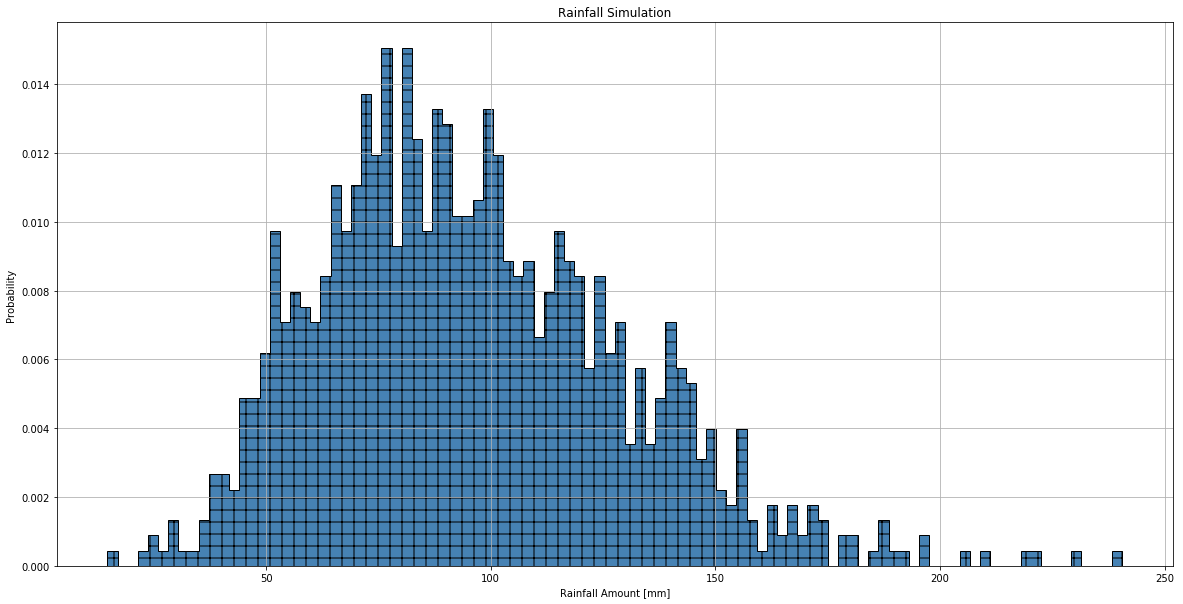

DescribeResult(nobs=1000, minmax=(14.679703169194688, 240.52245122095303), mean=95.6512429442625, variance=1138.356102477224, skewness=0.6431456695309283, kurtosis=0.5730919766821678)


In [82]:
october9 = optionRainfallCalculator(iterations=1000,
                              startDate='2014-04-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 9)